<a href="https://colab.research.google.com/github/NathanH-VCU/Access-Twitter-API/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# online tutorial followed: https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f

In [2]:
import pandas as pd
import io
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
print(tf.__version__)
url = 'https://raw.githubusercontent.com/NathanH-VCU/Access-Twitter-API/main/src/comments.csv'
df = pd.read_csv(url)
df.head()

2.8.2


,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [3]:
# df['sentiments'] = df.rating.apply(lambda x: 0 if x in [1, 2] else 1)
# df.head()

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [5]:
#Keep 90% of data for training and 10% for test

split = round(len(df)*0.9)
train_reviews = df['Comment'][:split]
train_label = df['Sentiment'][:split]
test_reviews = df['Comment'][split:]
test_label = df['Sentiment'][split:]

In [6]:
import numpy as np
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [7]:
vocab_size = 40000 # vocab_size 40,000 means we will take 40,000 unique words to train the network
embedding_dim = 16 # each word will be represented by a 16-dimensional vector
max_length = 120 # 120 words from each review
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [9]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,       input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           640000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________


In [13]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [14]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
518/518 [==============================] - 5s 8ms/step - loss: -5.1222 - accuracy: 0.2553 - val_loss: -27.1061 - val_accuracy: 0.2211
Epoch 2/20
518/518 [==============================] - 4s 7ms/step - loss: -73.2525 - accuracy: 0.2554 - val_loss: -205.5729 - val_accuracy: 0.2211
Epoch 3/20
518/518 [==============================] - 2s 3ms/step - loss: -297.8735 - accuracy: 0.2554 - val_loss: -642.0946 - val_accuracy: 0.2211
Epoch 4/20
518/518 [==============================] - 2s 4ms/step - loss: -737.1369 - accuracy: 0.2554 - val_loss: -1390.4155 - val_accuracy: 0.2211
Epoch 5/20
518/518 [==============================] - 2s 4ms/step - loss: -1423.7203 - accuracy: 0.2554 - val_loss: -2487.3269 - val_accuracy: 0.2211
Epoch 6/20
518/518 [==============================] - 3s 6ms/step - loss: -2377.2744 - accuracy: 0.2554 - val_loss: -3952.0393 - val_accuracy: 0.2211
Epoch 7/20
518/518 [==============================] - 3s 7ms/step - loss: -3623.2507 - accuracy: 0.2554 - val_l

<Figure size 432x288 with 0 Axes>

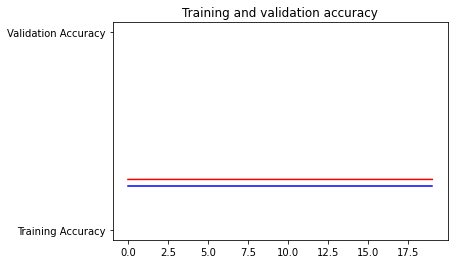

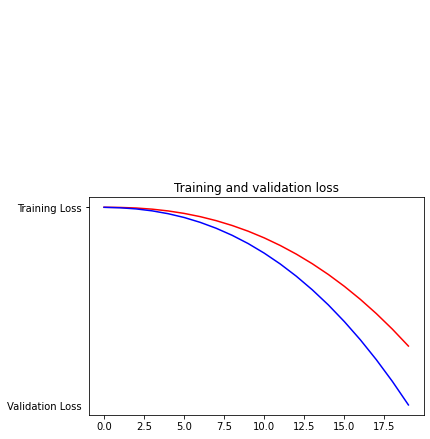

<Figure size 432x288 with 0 Axes>

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nValidation Loss')
plt.title('Training and validation loss')
plt.figure()

In [15]:
max_len = 200
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)

sentiment = ['Neutral','Negative','Positive']
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])

test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

ValueError: ignored

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()